## Импорт зависимостей

In [117]:
import sys
sys.path.append("../")

from src.distributions import skewnormal_distribution, normal_distribution
from src.utils import build_dataset

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV # Для выбора лучших гиперпараметров
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Метрики для оценки качества моделей

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1.  Исследование важности характеристик, как признаков классификации и изучение важности характеристик с ростом $n$.

### 1.1 Исследование важности характеристик для выборок размера 10, 25, 50, 100, 150.

In [2]:
n = [10, 25, 50, 100, 150]

#### 1.1.1 Распределение и корреляция признаков при $n = 10$

In [3]:
data = build_dataset(skewnormal_distribution, normal_distribution, 1, 1, 1000, n[0], "dist", 2)

100%|██████████| 1000/1000 [00:00<00:00, 3615.14it/s]


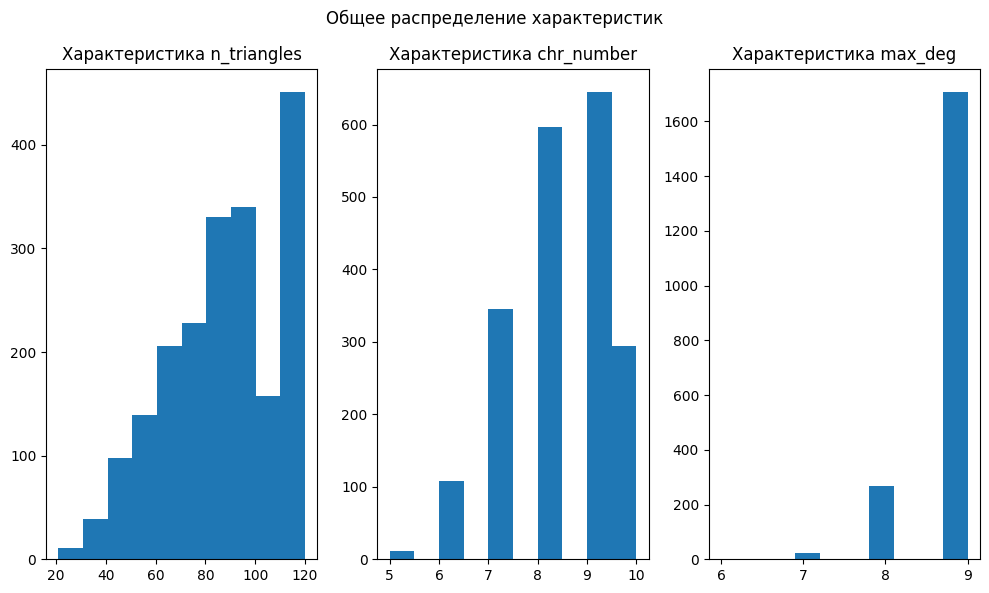

In [4]:
figure, axis = plt.subplots(nrows=1, ncols=data.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data.columns[:-1]):
    axis[j].hist(data[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Общее распределение характеристик")
plt.tight_layout()

In [5]:
data_0 = data[data["class"] == 0]
data_1 = data[data["class"] == 1]

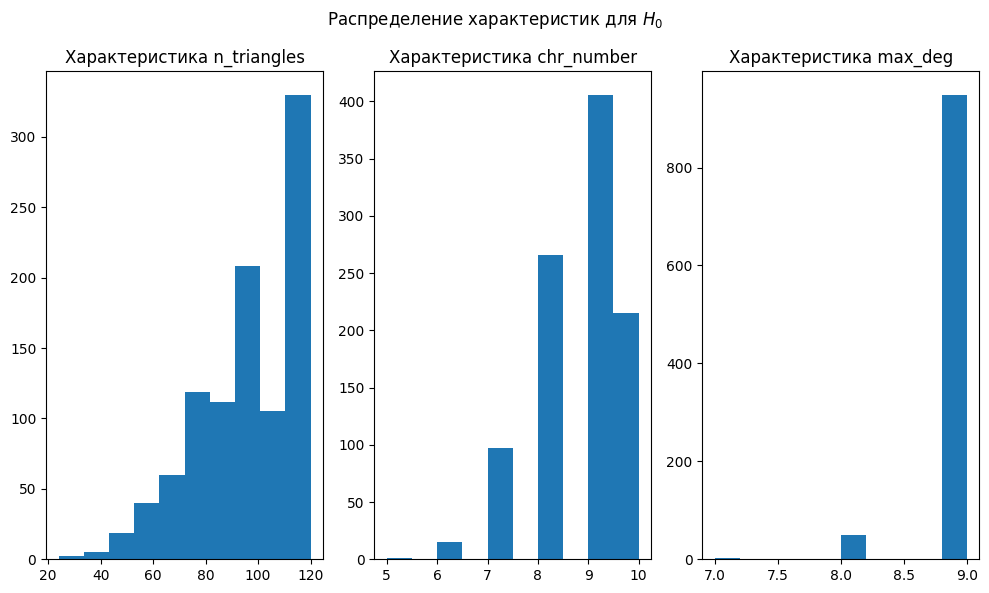

In [6]:
figure, axis = plt.subplots(nrows=1, ncols=data_0.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data_0.columns[:-1]):
    axis[j].hist(data_0[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Распределение характеристик для $H_0$")
plt.tight_layout()

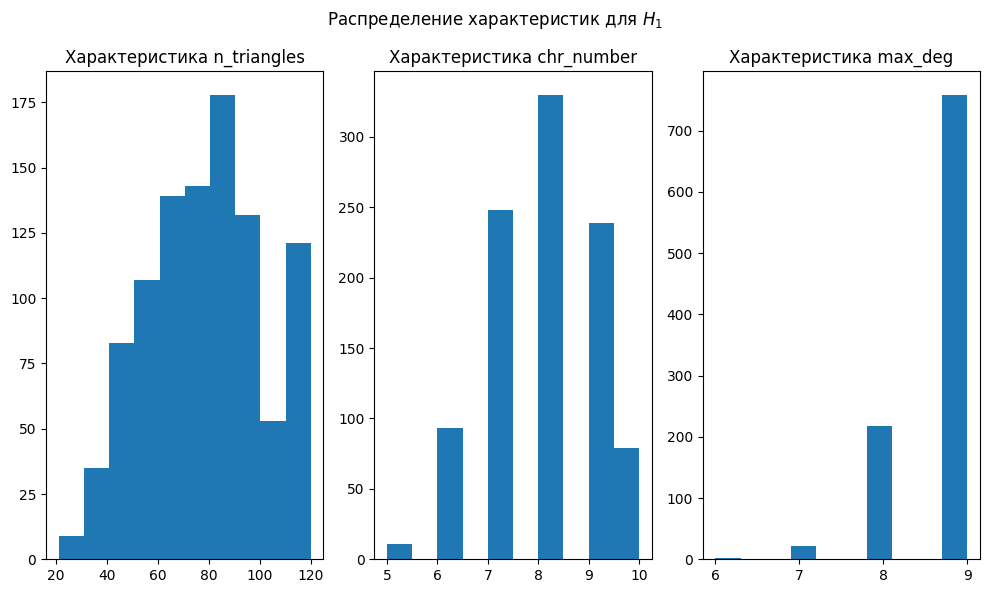

In [7]:
figure, axis = plt.subplots(nrows=1, ncols=data_1.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data_1.columns[:-1]):
    axis[j].hist(data_1[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Распределение характеристик для $H_1$")
plt.tight_layout()

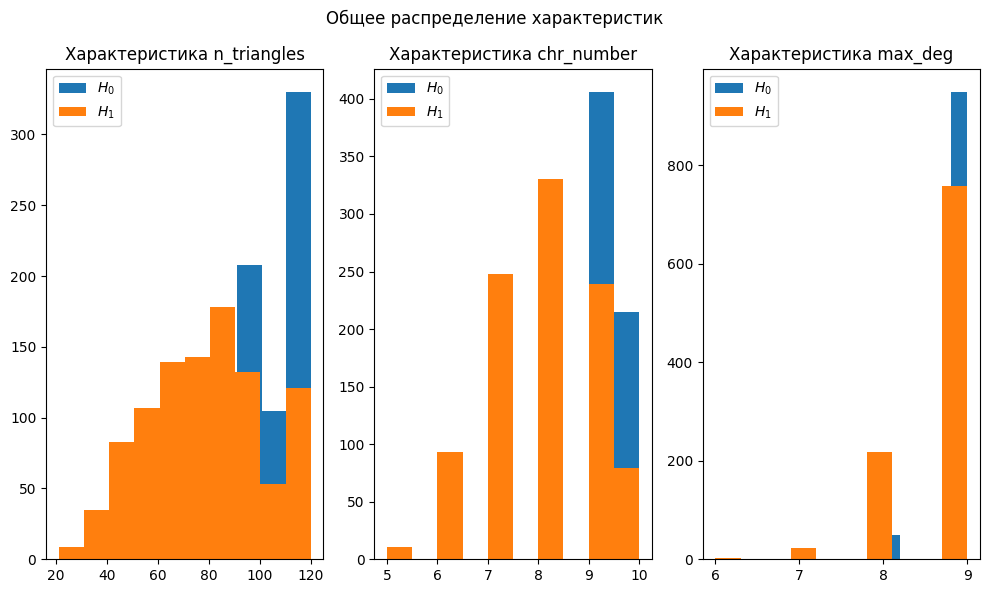

In [8]:
figure, axis = plt.subplots(nrows=1, ncols=data.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data.columns[:-1]):
    axis[j].hist(data_0[col], label = "$H_0$")
    axis[j].hist(data_1[col], label = "$H_1$")
    axis[j].set_title(f"Характеристика {col}")
    axis[j].legend()
    
plt.suptitle("Общее распределение характеристик")
plt.tight_layout()

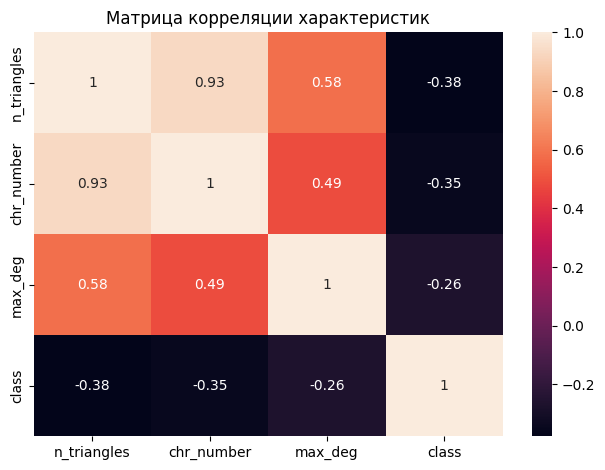

In [9]:
sns.heatmap(data.corr(), annot=True)
plt.title("Матрица корреляции характеристик")
plt.tight_layout()

Как мы можем заметить, характеристики очень сильно зависят друг от друга, тем не менее, наблюдается умеренная корелляция между характеристиками и классами.

In [10]:
new_data = data.copy()

In [11]:
new_data.head()

,n_triangles,chr_number,max_deg,class
0,99,9,9,0
1,99,9,9,1
2,120,10,9,0
3,54,7,8,1
4,120,10,9,0


In [12]:
new_data["x1**2"] = new_data["n_triangles"]**2
new_data["x2**2"] = new_data["chr_number"]**2
new_data["x3**2"] = new_data["max_deg"]**2
new_data["log_x1"] = np.log(new_data["n_triangles"])
new_data["log_x2"] = np.log(new_data["chr_number"])
new_data["log_x3"] = np.log(new_data["max_deg"])
new_data["x1*x3"] = new_data["n_triangles"]*new_data["max_deg"]

In [13]:
new_data.head()

,n_triangles,chr_number,max_deg,class,x1**2,x2**2,x3**2,log_x1,log_x2,log_x3,x1*x3
0,99,9,9,0,9801,81,81,4.595120,2.197225,2.197225,891
1,99,9,9,1,9801,81,81,4.595120,2.197225,2.197225,891
2,120,10,9,0,14400,100,81,4.787492,2.302585,2.197225,1080
3,54,7,8,1,2916,49,64,3.988984,1.945910,2.079442,432
4,120,10,9,0,14400,100,81,4.787492,2.302585,2.197225,1080


In [14]:
new_data.columns

Index(['n_triangles', 'chr_number', 'max_deg', 'class', 'x1**2', 'x2**2',
       'x3**2', 'log_x1', 'log_x2', 'log_x3', 'x1*x3'],
      dtype='object')

In [15]:
i = -1
c = list(new_data.columns)
tmp = ""
for j in range(len(c)):
    if i != -1:
        c[i], c[j] = c[j], c[i]
    if c[j] == "class":
        i = j
new_data = new_data[c]

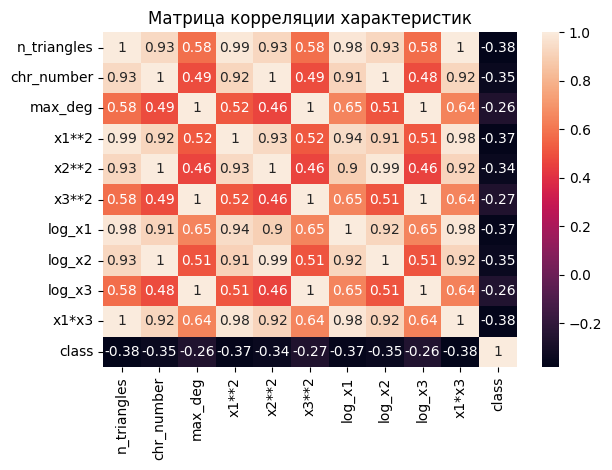

In [16]:
sns.heatmap(new_data.corr(), annot=True)
plt.title("Матрица корреляции характеристик")
plt.tight_layout()

Добавление новых характеристик картину не улучшило.

#### 1.1.2 Распределение и корреляция признаков при $n = 25$

In [17]:
data = build_dataset(skewnormal_distribution, normal_distribution, 1, 1, 1000, n[1], "dist", 2)

100%|██████████| 1000/1000 [00:01<00:00, 796.77it/s]


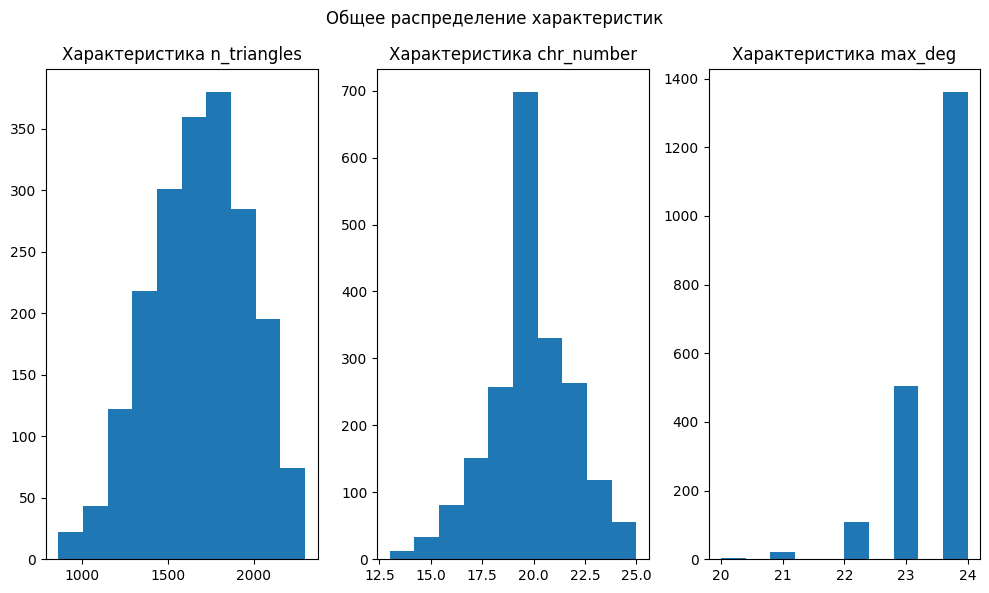

In [18]:
figure, axis = plt.subplots(nrows=1, ncols=data.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data.columns[:-1]):
    axis[j].hist(data[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Общее распределение характеристик")
plt.tight_layout()

In [19]:
data_0 = data[data["class"] == 0]
data_1 = data[data["class"] == 1]

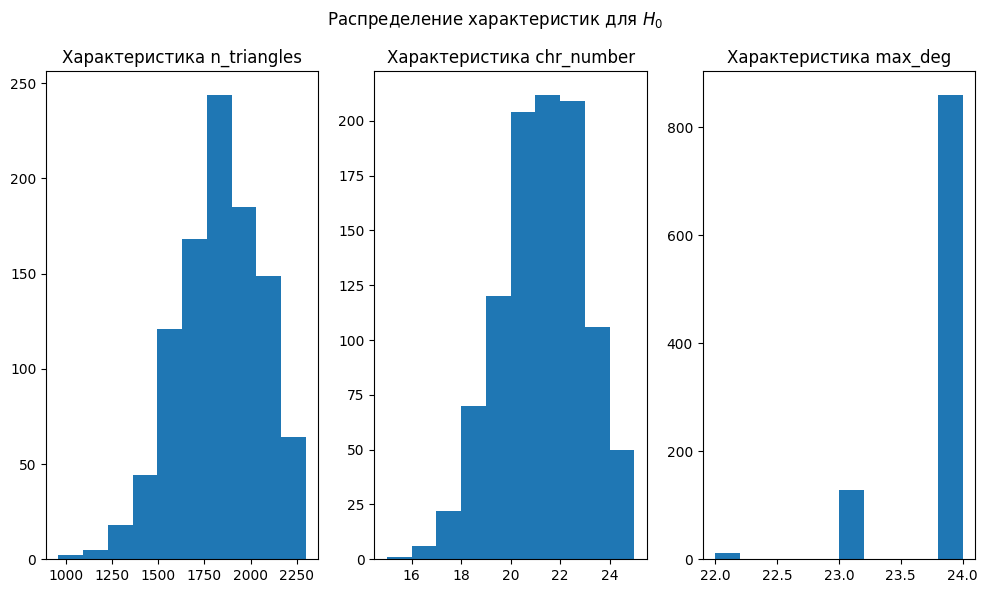

In [20]:
figure, axis = plt.subplots(nrows=1, ncols=data_0.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data_0.columns[:-1]):
    axis[j].hist(data_0[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Распределение характеристик для $H_0$")
plt.tight_layout()

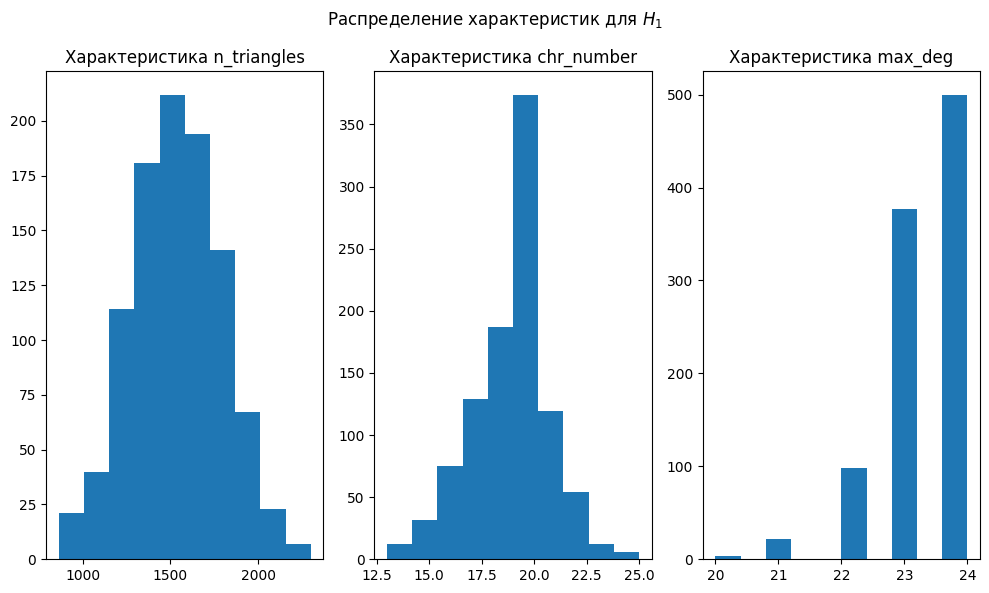

In [21]:
figure, axis = plt.subplots(nrows=1, ncols=data_1.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data_1.columns[:-1]):
    axis[j].hist(data_1[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Распределение характеристик для $H_1$")
plt.tight_layout()

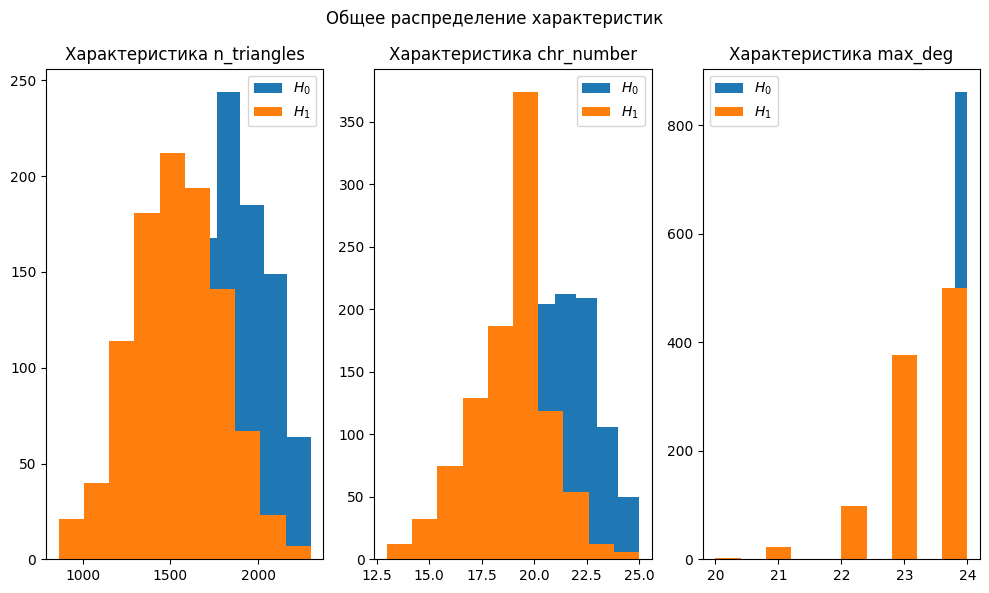

In [22]:
figure, axis = plt.subplots(nrows=1, ncols=data.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data.columns[:-1]):
    axis[j].hist(data_0[col], label = "$H_0$")
    axis[j].hist(data_1[col], label = "$H_1$")
    axis[j].set_title(f"Характеристика {col}")
    axis[j].legend()
    
plt.suptitle("Общее распределение характеристик")
plt.tight_layout()

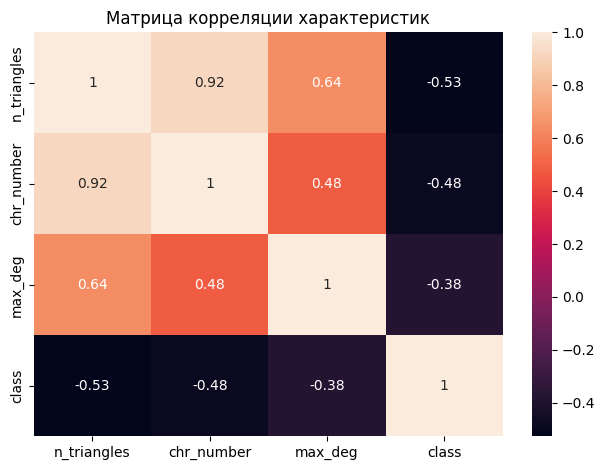

In [23]:
sns.heatmap(data.corr(), annot=True)
plt.title("Матрица корреляции характеристик")
plt.tight_layout()

Как мы можем заметить, характеристики очень сильно зависят друг от друга, тем не менее, наблюдается умеренная корелляция между характеристиками и классами.

In [24]:
new_data = data.copy()

In [25]:
new_data.head()

,n_triangles,chr_number,max_deg,class
0,1769,19,24,0
1,1575,18,23,1
2,1853,22,24,0
3,1400,17,24,1
4,1879,21,24,0


In [26]:
new_data["x1**2"] = new_data["n_triangles"]**2
new_data["x2**2"] = new_data["chr_number"]**2
new_data["x3**2"] = new_data["max_deg"]**2
new_data["log_x1"] = np.log(new_data["n_triangles"])
new_data["log_x2"] = np.log(new_data["chr_number"])
new_data["log_x3"] = np.log(new_data["max_deg"])
new_data["x1*x3"] = new_data["n_triangles"]*new_data["max_deg"]

In [27]:
new_data.head()

,n_triangles,chr_number,max_deg,class,x1**2,x2**2,x3**2,log_x1,log_x2,log_x3,x1*x3
0,1769,19,24,0,3129361,361,576,7.478170,2.944439,3.178054,42456
1,1575,18,23,1,2480625,324,529,7.362011,2.890372,3.135494,36225
2,1853,22,24,0,3433609,484,576,7.524561,3.091042,3.178054,44472
3,1400,17,24,1,1960000,289,576,7.244228,2.833213,3.178054,33600
4,1879,21,24,0,3530641,441,576,7.538495,3.044522,3.178054,45096


In [28]:
new_data.columns

Index(['n_triangles', 'chr_number', 'max_deg', 'class', 'x1**2', 'x2**2',
       'x3**2', 'log_x1', 'log_x2', 'log_x3', 'x1*x3'],
      dtype='object')

In [29]:
i = -1
c = list(new_data.columns)
tmp = ""
for j in range(len(c)):
    if i != -1:
        c[i], c[j] = c[j], c[i]
    if c[j] == "class":
        i = j
new_data = new_data[c]

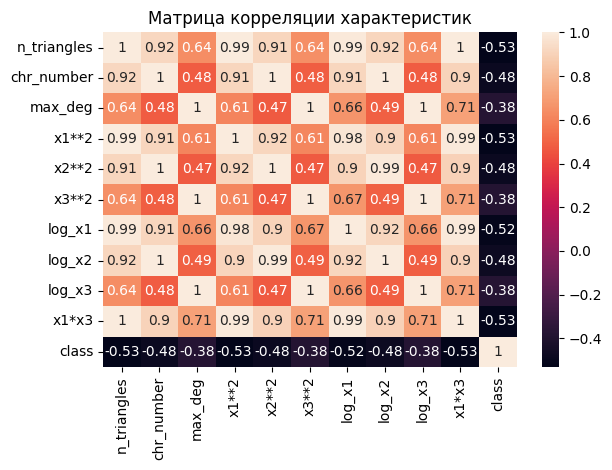

In [30]:
sns.heatmap(new_data.corr(), annot=True)
plt.title("Матрица корреляции характеристик")
plt.tight_layout()

Добавление новых характеристик картину не улучшило.

#### 1.1.3 Распределение и корреляция признаков при $n = 50$

In [31]:
data = build_dataset(skewnormal_distribution, normal_distribution, 1, 1, 1000, n[2], "dist", 2)

100%|██████████| 1000/1000 [00:07<00:00, 129.91it/s]


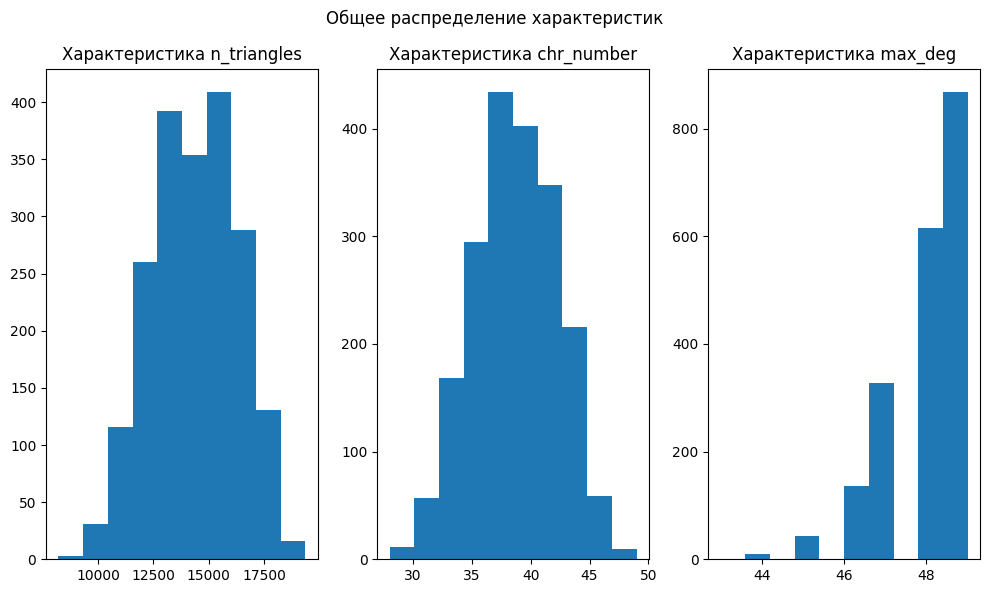

In [32]:
figure, axis = plt.subplots(nrows=1, ncols=data.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data.columns[:-1]):
    axis[j].hist(data[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Общее распределение характеристик")
plt.tight_layout()

In [33]:
data_0 = data[data["class"] == 0]
data_1 = data[data["class"] == 1]

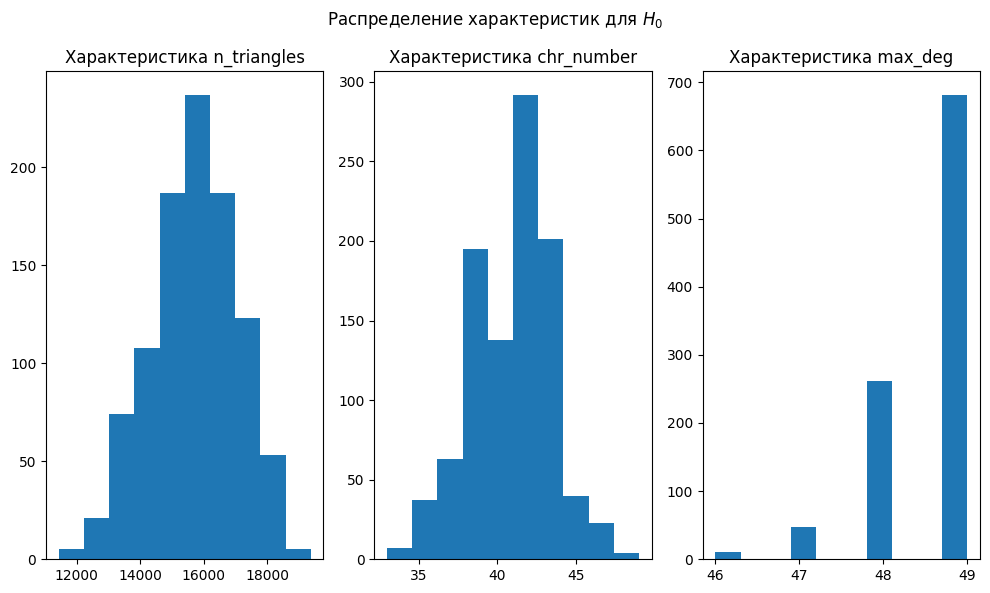

In [34]:
figure, axis = plt.subplots(nrows=1, ncols=data_0.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data_0.columns[:-1]):
    axis[j].hist(data_0[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Распределение характеристик для $H_0$")
plt.tight_layout()

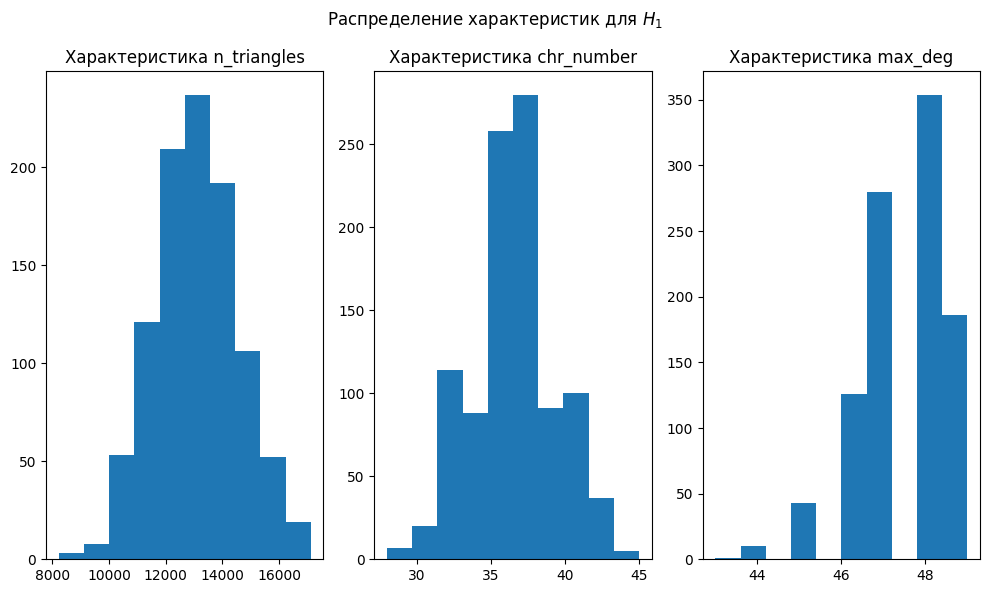

In [35]:
figure, axis = plt.subplots(nrows=1, ncols=data_1.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data_1.columns[:-1]):
    axis[j].hist(data_1[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Распределение характеристик для $H_1$")
plt.tight_layout()

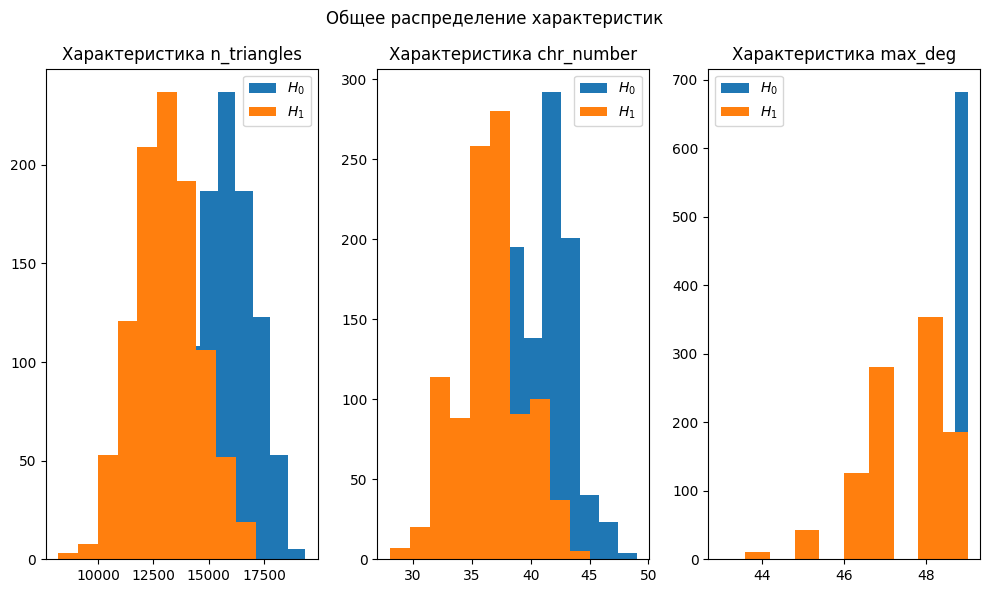

In [36]:
figure, axis = plt.subplots(nrows=1, ncols=data.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data.columns[:-1]):
    axis[j].hist(data_0[col], label = "$H_0$")
    axis[j].hist(data_1[col], label = "$H_1$")
    axis[j].set_title(f"Характеристика {col}")
    axis[j].legend()
    
plt.suptitle("Общее распределение характеристик")
plt.tight_layout()

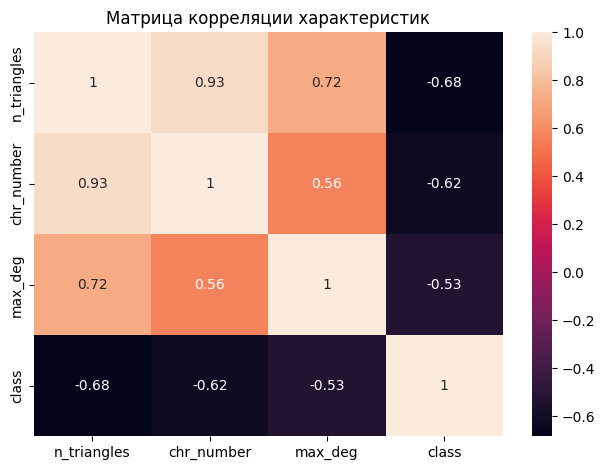

In [37]:
sns.heatmap(data.corr(), annot=True)
plt.title("Матрица корреляции характеристик")
plt.tight_layout()

Как мы можем заметить, характеристики очень сильно зависят друг от друга, тем не менее, наблюдается умеренная корелляция между характеристиками и классами.

In [38]:
new_data = data.copy()

In [39]:
new_data.head()

,n_triangles,chr_number,max_deg,class
0,17178,43,49,0
1,15247,41,48,1
2,17819,45,49,0
3,16151,43,49,1
4,14505,39,47,0


In [40]:
new_data["x1**2"] = new_data["n_triangles"]**2
new_data["x2**2"] = new_data["chr_number"]**2
new_data["x3**2"] = new_data["max_deg"]**2
new_data["log_x1"] = np.log(new_data["n_triangles"])
new_data["log_x2"] = np.log(new_data["chr_number"])
new_data["log_x3"] = np.log(new_data["max_deg"])
new_data["x1*x3"] = new_data["n_triangles"]*new_data["max_deg"]

In [41]:
new_data.head()

,n_triangles,chr_number,max_deg,class,x1**2,x2**2,x3**2,log_x1,log_x2,log_x3,x1*x3
0,17178,43,49,0,295083684,1849,2401,9.751385,3.761200,3.891820,841722
1,15247,41,48,1,232471009,1681,2304,9.632138,3.713572,3.871201,731856
2,17819,45,49,0,317516761,2025,2401,9.788021,3.806662,3.891820,873131
3,16151,43,49,1,260854801,1849,2401,9.689737,3.761200,3.891820,791399
4,14505,39,47,0,210395025,1521,2209,9.582249,3.663562,3.850148,681735


In [42]:
new_data.columns

Index(['n_triangles', 'chr_number', 'max_deg', 'class', 'x1**2', 'x2**2',
       'x3**2', 'log_x1', 'log_x2', 'log_x3', 'x1*x3'],
      dtype='object')

In [43]:
i = -1
c = list(new_data.columns)
tmp = ""
for j in range(len(c)):
    if i != -1:
        c[i], c[j] = c[j], c[i]
    if c[j] == "class":
        i = j
new_data = new_data[c]

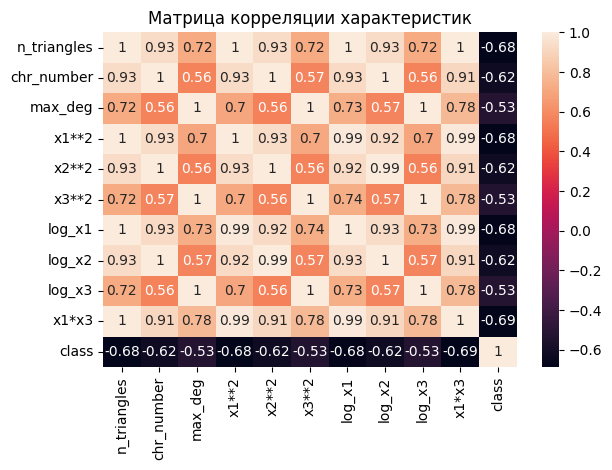

In [44]:
sns.heatmap(new_data.corr(), annot=True)
plt.title("Матрица корреляции характеристик")
plt.tight_layout()

Добавление новых характеристик картину не улучшило.

#### 1.1.4 Распределение и корреляция признаков при $n = 100$

In [45]:
data = build_dataset(skewnormal_distribution, normal_distribution, 1, 1, 1000, n[3], "dist", 2)

100%|██████████| 1000/1000 [00:50<00:00, 19.82it/s]


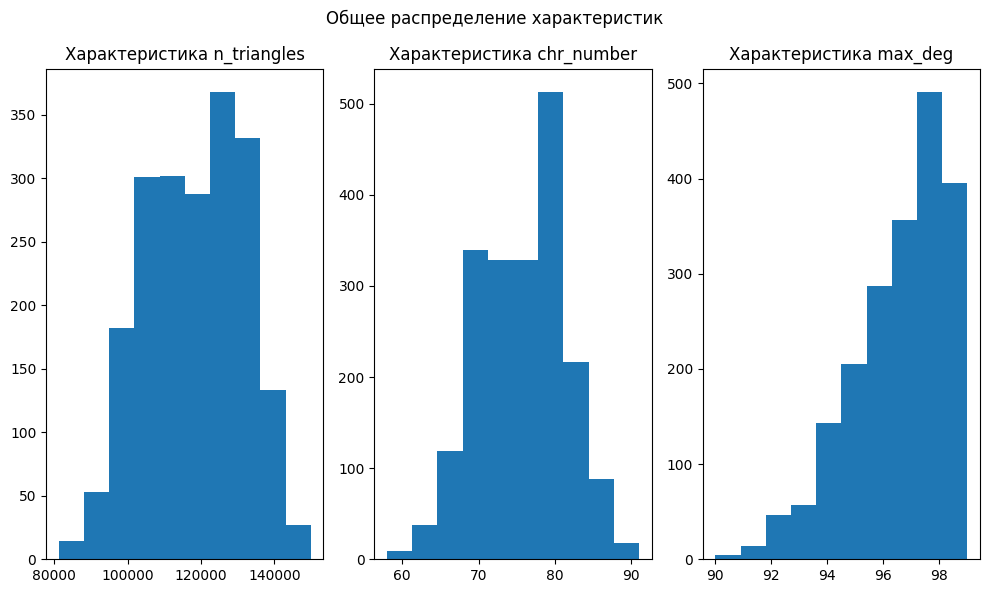

In [46]:
figure, axis = plt.subplots(nrows=1, ncols=data.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data.columns[:-1]):
    axis[j].hist(data[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Общее распределение характеристик")
plt.tight_layout()

In [47]:
data_0 = data[data["class"] == 0]
data_1 = data[data["class"] == 1]

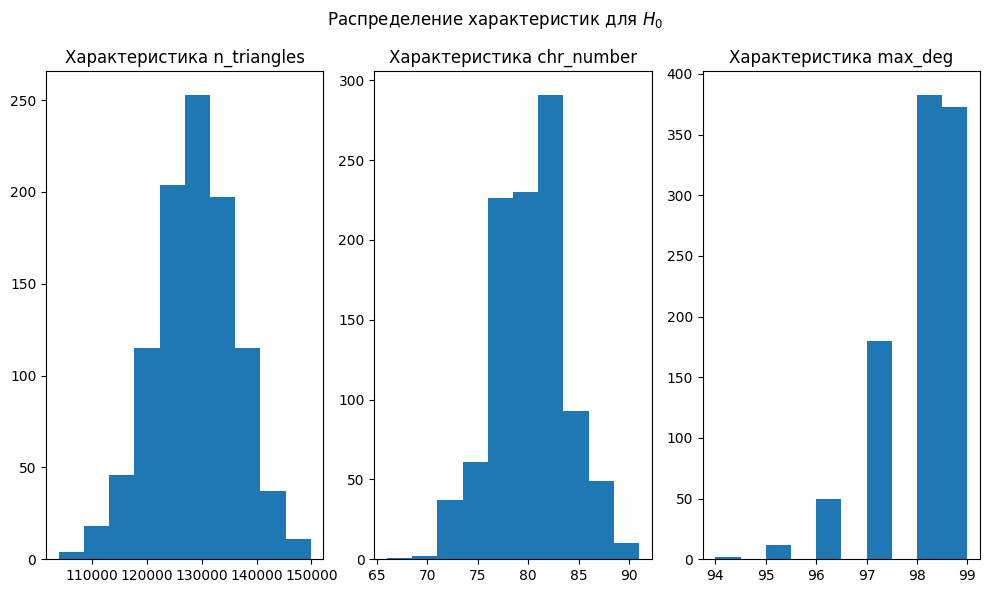

In [48]:
figure, axis = plt.subplots(nrows=1, ncols=data_0.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data_0.columns[:-1]):
    axis[j].hist(data_0[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Распределение характеристик для $H_0$")
plt.tight_layout()

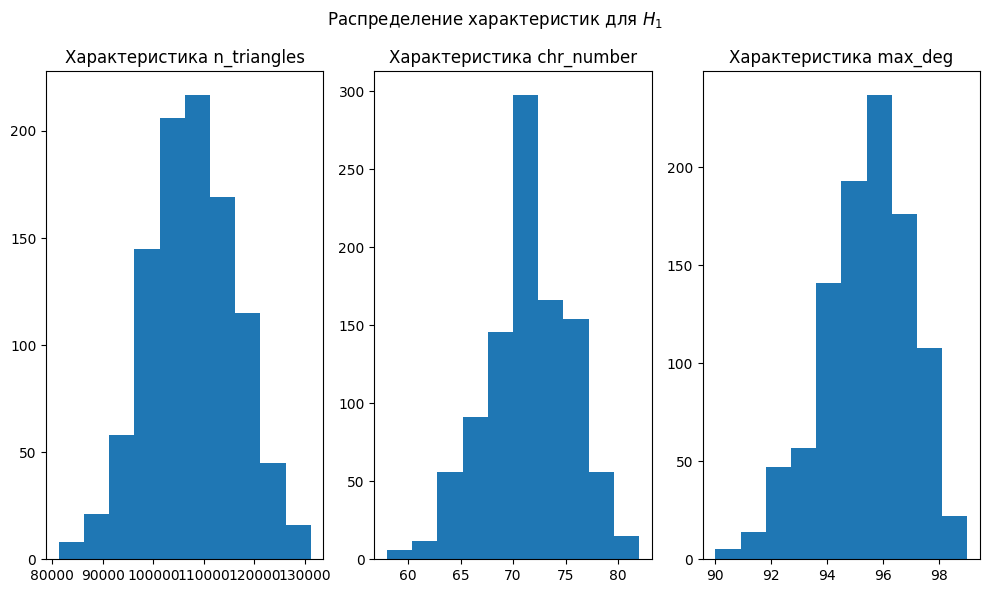

In [49]:
figure, axis = plt.subplots(nrows=1, ncols=data_1.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data_1.columns[:-1]):
    axis[j].hist(data_1[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Распределение характеристик для $H_1$")
plt.tight_layout()

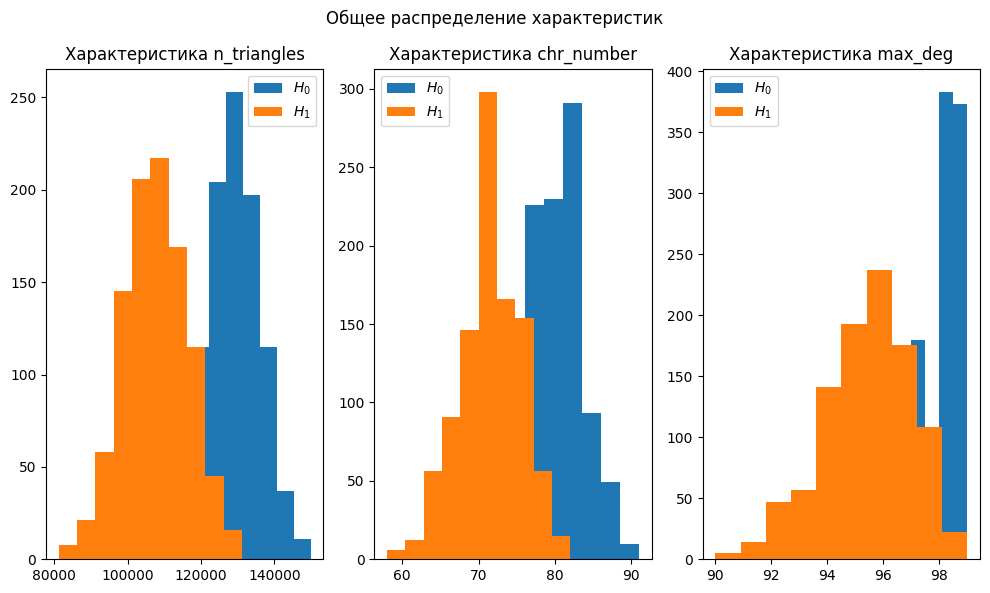

In [50]:
figure, axis = plt.subplots(nrows=1, ncols=data.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data.columns[:-1]):
    axis[j].hist(data_0[col], label = "$H_0$")
    axis[j].hist(data_1[col], label = "$H_1$")
    axis[j].set_title(f"Характеристика {col}")
    axis[j].legend()
    
plt.suptitle("Общее распределение характеристик")
plt.tight_layout()

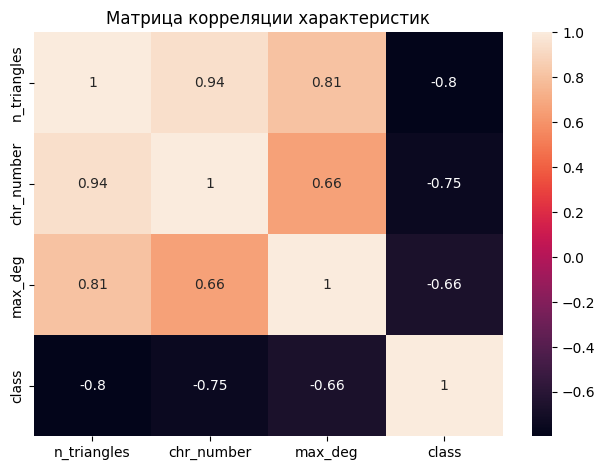

In [51]:
sns.heatmap(data.corr(), annot=True)
plt.title("Матрица корреляции характеристик")
plt.tight_layout()

Как мы можем заметить, характеристики очень сильно зависят друг от друга, тем не менее, наблюдается умеренная корелляция между характеристиками и классами.

In [52]:
new_data = data.copy()

In [53]:
new_data.head()

,n_triangles,chr_number,max_deg,class
0,127422,79,97,0
1,93397,64,94,1
2,135750,79,99,0
3,105173,73,95,1
4,123045,78,99,0


In [54]:
new_data["x1**2"] = new_data["n_triangles"]**2
new_data["x2**2"] = new_data["chr_number"]**2
new_data["x3**2"] = new_data["max_deg"]**2
new_data["log_x1"] = np.log(new_data["n_triangles"])
new_data["log_x2"] = np.log(new_data["chr_number"])
new_data["log_x3"] = np.log(new_data["max_deg"])
new_data["x1*x3"] = new_data["n_triangles"]*new_data["max_deg"]

In [55]:
new_data.head()

,n_triangles,chr_number,max_deg,class,x1**2,x2**2,x3**2,log_x1,log_x2,log_x3,x1*x3
0,127422,79,97,0,16236366084,6241,9409,11.755260,4.369448,4.574711,12359934
1,93397,64,94,1,8722999609,4096,8836,11.444615,4.158883,4.543295,8779318
2,135750,79,99,0,18428062500,6241,9801,11.818570,4.369448,4.595120,13439250
3,105173,73,95,1,11061359929,5329,9025,11.563362,4.290459,4.553877,9991435
4,123045,78,99,0,15140072025,6084,9801,11.720305,4.356709,4.595120,12181455


In [56]:
new_data.columns

Index(['n_triangles', 'chr_number', 'max_deg', 'class', 'x1**2', 'x2**2',
       'x3**2', 'log_x1', 'log_x2', 'log_x3', 'x1*x3'],
      dtype='object')

In [57]:
i = -1
c = list(new_data.columns)
tmp = ""
for j in range(len(c)):
    if i != -1:
        c[i], c[j] = c[j], c[i]
    if c[j] == "class":
        i = j
new_data = new_data[c]

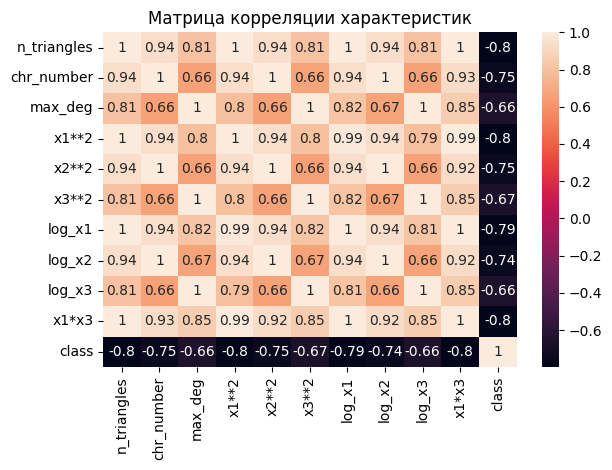

In [58]:
sns.heatmap(new_data.corr(), annot=True)
plt.title("Матрица корреляции характеристик")
plt.tight_layout()

Добавление новых характеристик картину не улучшило.

#### 1.1.5 Распределение и корреляция признаков при $n = 150$

In [59]:
data = build_dataset(skewnormal_distribution, normal_distribution, 1, 1, 1000, n[4], "dist", 2)

100%|██████████| 1000/1000 [02:43<00:00,  6.11it/s]


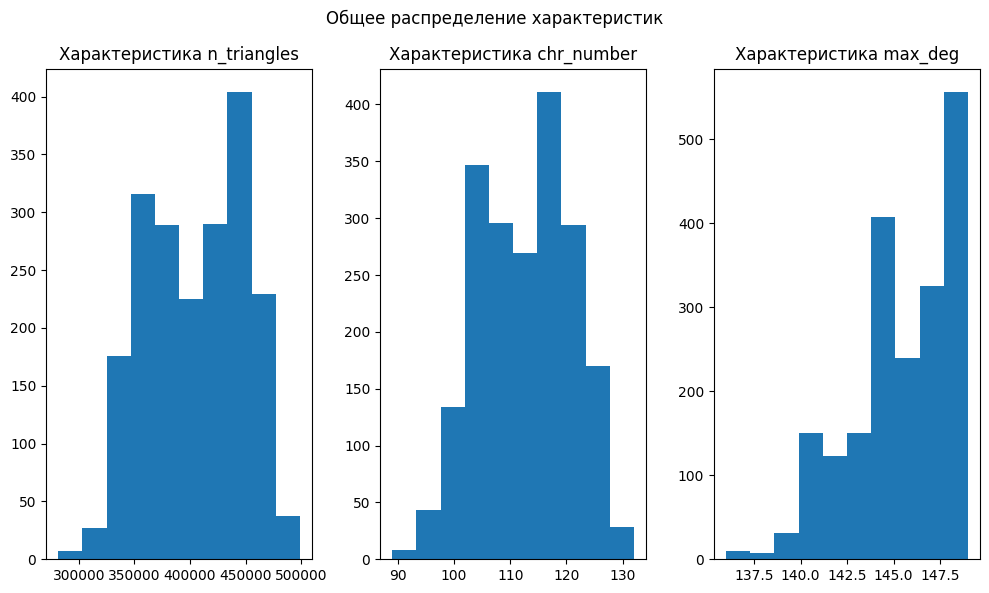

In [60]:
figure, axis = plt.subplots(nrows=1, ncols=data.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data.columns[:-1]):
    axis[j].hist(data[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Общее распределение характеристик")
plt.tight_layout()

In [61]:
data_0 = data[data["class"] == 0]
data_1 = data[data["class"] == 1]

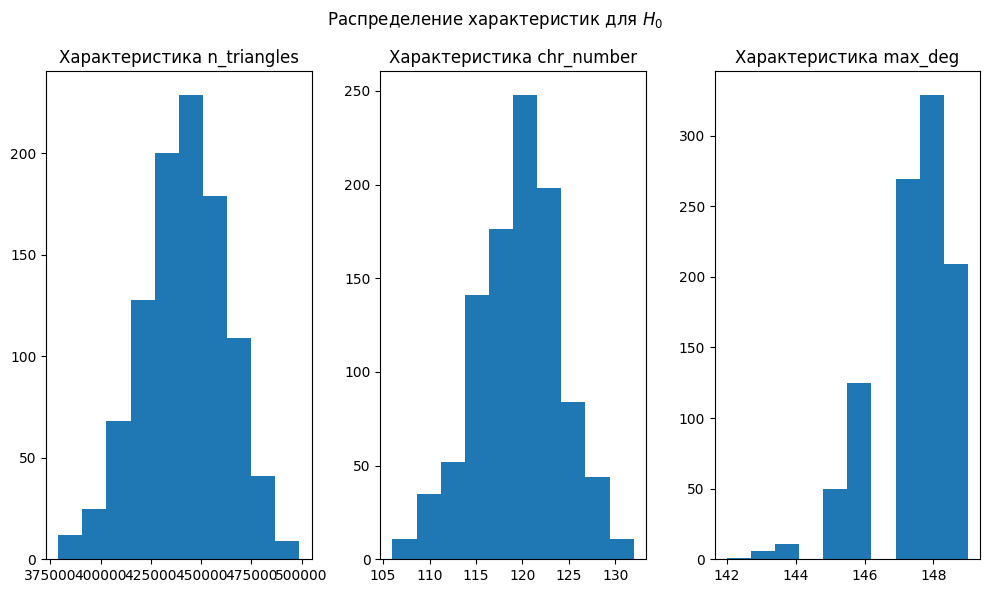

In [62]:
figure, axis = plt.subplots(nrows=1, ncols=data_0.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data_0.columns[:-1]):
    axis[j].hist(data_0[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Распределение характеристик для $H_0$")
plt.tight_layout()

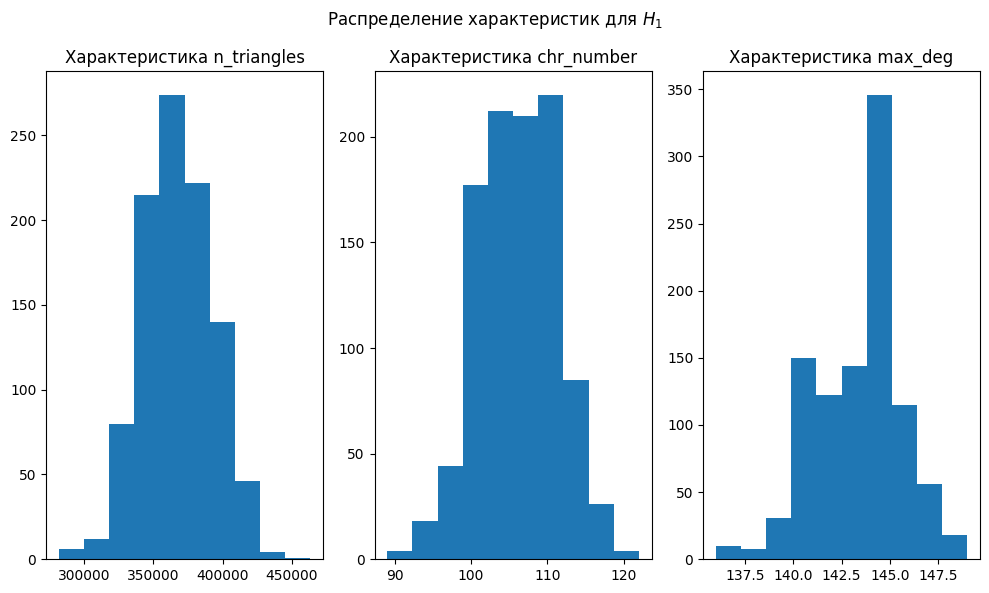

In [63]:
figure, axis = plt.subplots(nrows=1, ncols=data_1.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data_1.columns[:-1]):
    axis[j].hist(data_1[col])
    axis[j].set_title(f"Характеристика {col}")
    
plt.suptitle("Распределение характеристик для $H_1$")
plt.tight_layout()

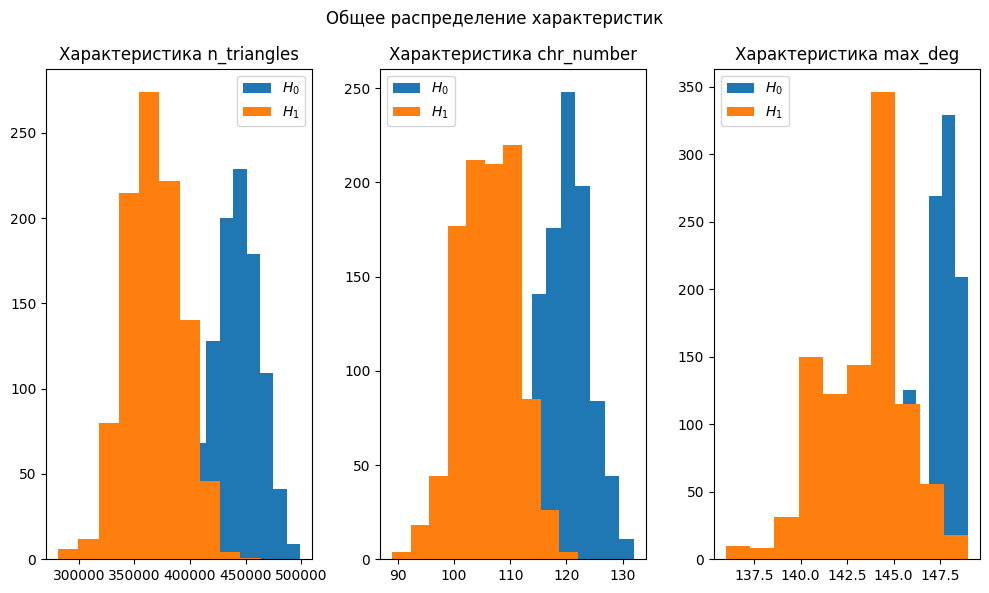

In [64]:
figure, axis = plt.subplots(nrows=1, ncols=data.shape[1]-1, figsize=(10, 6))

for j, col in enumerate(data.columns[:-1]):
    axis[j].hist(data_0[col], label = "$H_0$")
    axis[j].hist(data_1[col], label = "$H_1$")
    axis[j].set_title(f"Характеристика {col}")
    axis[j].legend()
    
plt.suptitle("Общее распределение характеристик")
plt.tight_layout()

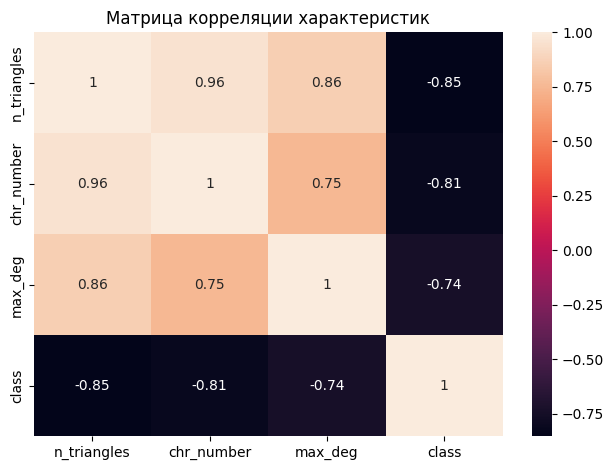

In [65]:
sns.heatmap(data.corr(), annot=True)
plt.title("Матрица корреляции характеристик")
plt.tight_layout()

Как мы можем заметить, характеристики очень сильно зависят друг от друга, тем не менее, наблюдается умеренная корелляция между характеристиками и классами.

In [66]:
new_data = data.copy()

In [67]:
new_data.head()

,n_triangles,chr_number,max_deg,class
0,405891,117,146,0
1,364243,107,143,1
2,449060,124,147,0
3,344978,102,139,1
4,435805,110,149,0


In [68]:
new_data["x1**2"] = new_data["n_triangles"]**2
new_data["x2**2"] = new_data["chr_number"]**2
new_data["x3**2"] = new_data["max_deg"]**2
new_data["log_x1"] = np.log(new_data["n_triangles"])
new_data["log_x2"] = np.log(new_data["chr_number"])
new_data["log_x3"] = np.log(new_data["max_deg"])
new_data["x1*x3"] = new_data["n_triangles"]*new_data["max_deg"]

In [69]:
new_data.head()

,n_triangles,chr_number,max_deg,class,x1**2,x2**2,x3**2,log_x1,log_x2,log_x3,x1*x3
0,405891,117,146,0,164747503881,13689,21316,12.913840,4.762174,4.983607,59260086
1,364243,107,143,1,132672963049,11449,20449,12.805577,4.672829,4.962845,52086749
2,449060,124,147,0,201654883600,15376,21609,13.014912,4.820282,4.990433,66011820
3,344978,102,139,1,119009820484,10404,19321,12.751236,4.624973,4.934474,47951942
4,435805,110,149,0,189925998025,12100,22201,12.984950,4.700480,5.003946,64934945


In [70]:
new_data.columns

Index(['n_triangles', 'chr_number', 'max_deg', 'class', 'x1**2', 'x2**2',
       'x3**2', 'log_x1', 'log_x2', 'log_x3', 'x1*x3'],
      dtype='object')

In [71]:
i = -1
c = list(new_data.columns)
tmp = ""
for j in range(len(c)):
    if i != -1:
        c[i], c[j] = c[j], c[i]
    if c[j] == "class":
        i = j
new_data = new_data[c]

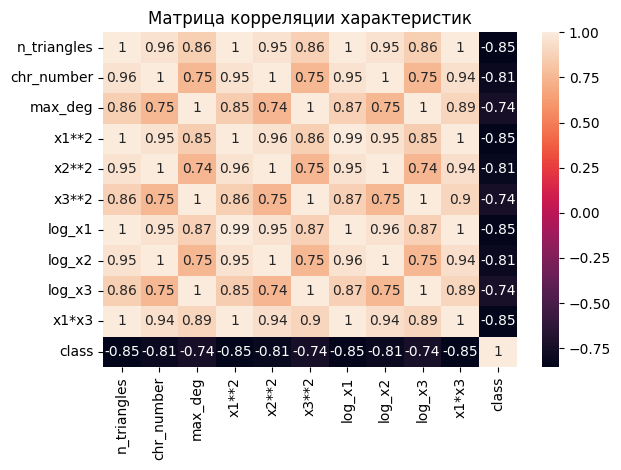

In [72]:
sns.heatmap(new_data.corr(), annot=True)
plt.title("Матрица корреляции характеристик")
plt.tight_layout()

Добавление новых характеристик картину не улучшило.

## 2. Применение классификационных алгоритмов.

Определение гипотез можно рассмотреть как задачу классификации, а с этой задачей хорошо справляются ML-алгоритмы. 

Предлагую рассмотреть алгоритмы: KNN, LogisticRegression, CatBoost

In [171]:
n = [25, 50, 100]

acc_vars = np.array([])
prec_vars = np.array([])
rec_vars = np.array([])
f1_vars = np.array([])

knn_imps = [np.array([]), np.array([]), np.array([])]
lr_imps = [np.array([]), np.array([]), np.array([])]
cbc_imps = [np.array([]), np.array([]), np.array([])]

### 2.1 Размер выборки $n = 25$.

In [172]:
data = build_dataset(skewnormal_distribution, normal_distribution, 1, 1, 1000, n[0], "dist", 2)
X_data = data.drop(columns="class")
y_data = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

100%|██████████| 1000/1000 [00:01<00:00, 506.38it/s]


In [173]:
acc_metrics = np.array([])
prec_metrics = np.array([])
rec_metrics = np.array([])
f1_metrics = np.array([])

#### 2.1.1 Алгоритм KNN.

In [174]:
knn_params = {"n_neighbors": [1, 3, 5, 9]}

In [175]:
knn_model = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_model, knn_params, scoring="accuracy")

knn_cv.fit(X_train, y_train)
y_test_pred = knn_cv.best_estimator_.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

acc_metrics = np.append(acc_metrics, acc)
prec_metrics = np.append(prec_metrics, prec)
rec_metrics = np.append(rec_metrics, rec)
f1_metrics = np.append(f1_metrics, f1)

print(f"Accuracy is: {round(acc, 3)}")
print(f"Precision is: {round(prec, 3)}")
print(f"Recall is: {round(rec, 3)}")
print(f"F1 is: {round(f1, 3)}")


Accuracy is: 0.675
Precision is: 0.681
Recall is: 0.674
F1 is: 0.678


In [176]:
features = X_test.columns
result = permutation_importance(knn_cv.best_estimator_, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

for i, imp in enumerate(importance):
    knn_imps[i] = np.append(knn_imps[i], round(imp, 3))
    print(f"Feature {features[i]}: {imp:.3f}")

Feature n_triangles: 0.180
Feature chr_number: -0.012
Feature max_deg: 0.002


#### 2.1.2 Алгоритм LogisticRegression.

In [177]:
lr_params = {"C": [0.3, 0.5, 1], "max_iter": [1000, 5000, 10000]}

In [178]:
lr_model = LogisticRegression()

pipe = Pipeline([("scaler", StandardScaler()), ("model", GridSearchCV(lr_model, lr_params, scoring="accuracy"))])

pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

acc_metrics = np.append(acc_metrics, acc)
prec_metrics = np.append(prec_metrics, prec)
rec_metrics = np.append(rec_metrics, rec)
f1_metrics = np.append(f1_metrics, f1)

print(f"Accuracy is: {round(acc, 3)}")
print(f"Precision is: {round(prec, 3)}")
print(f"Recall is: {round(rec, 3)}")
print(f"F1 is: {round(f1, 3)}")


Accuracy is: 0.715
Precision is: 0.722
Recall is: 0.711
F1 is: 0.716


In [179]:
features = X_test.columns
for i, imp in enumerate(pipe["model"].best_estimator_.coef_.reshape(3, 1)):
    lr_imps[i] = np.append(lr_imps[i], round(imp[0], 3))
    print(f"Feature {features[i]}: {imp[0]:.3f}")

Feature n_triangles: -1.316
Feature chr_number: -0.024
Feature max_deg: -0.080


#### 2.1.3 Алгоритм CatBoostClassifier.

In [180]:
cbc_model = CatBoostClassifier()

cbc_model.fit(X_train, y_train)
y_test_pred = cbc_model.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

acc_metrics = np.append(acc_metrics, acc)
prec_metrics = np.append(prec_metrics, prec)
rec_metrics = np.append(rec_metrics, rec)
f1_metrics = np.append(f1_metrics, f1)

print(f"Accuracy is: {round(acc, 3)}")
print(f"Precision is: {round(prec, 3)}")
print(f"Recall is: {round(rec, 3)}")
print(f"F1 is: {round(f1, 3)}")


Learning rate set to 0.011894
0:	learn: 0.6895164	total: 3.42ms	remaining: 3.42s
1:	learn: 0.6854720	total: 8.56ms	remaining: 4.27s
2:	learn: 0.6817138	total: 11.7ms	remaining: 3.88s
3:	learn: 0.6784796	total: 14ms	remaining: 3.49s
4:	learn: 0.6751685	total: 16.7ms	remaining: 3.32s
5:	learn: 0.6718574	total: 19.4ms	remaining: 3.22s
6:	learn: 0.6681165	total: 23.3ms	remaining: 3.3s
7:	learn: 0.6649607	total: 26.6ms	remaining: 3.3s
8:	learn: 0.6615784	total: 29.6ms	remaining: 3.26s
9:	learn: 0.6583984	total: 32.5ms	remaining: 3.22s
10:	learn: 0.6550361	total: 36.7ms	remaining: 3.29s
11:	learn: 0.6517440	total: 39.4ms	remaining: 3.24s
12:	learn: 0.6489234	total: 42.1ms	remaining: 3.19s
13:	learn: 0.6462691	total: 44.9ms	remaining: 3.16s
14:	learn: 0.6436226	total: 47.5ms	remaining: 3.12s
15:	learn: 0.6410647	total: 51.7ms	remaining: 3.18s
16:	learn: 0.6386563	total: 54.8ms	remaining: 3.17s
17:	learn: 0.6361977	total: 58.3ms	remaining: 3.18s
18:	learn: 0.6339203	total: 60.8ms	remaining: 3.

In [181]:
features = X_test.columns
for i, imp in enumerate(cbc_model.get_feature_importance()):
    cbc_imps[i] = np.append(cbc_imps[i], round(imp, 3))
    print(f"Feature {features[i]}: {imp:.3f}")

Feature n_triangles: 67.563
Feature chr_number: 19.400
Feature max_deg: 13.037


#### 2.1.4 Дисперсия метрик

In [182]:
acc_var, prec_var, rec_var, f1_var = np.var(acc_metrics), np.var(prec_metrics), np.var(rec_metrics), np.var(f1_metrics)

acc_vars = np.append(acc_vars, acc_var)
prec_vars = np.append(prec_vars, prec_var)
rec_vars = np.append(rec_vars, rec_var)
f1_vars = np.append(f1_vars, f1_var)

print(f"Accuracy varience: {acc_var}")
print(f"Precision varience: {prec_var}")
print(f"Recall varience: {rec_var}")
print(f"F1 varience: {f1_var}")

Accuracy varience: 0.0002969135802469125
Precision varience: 0.00036473510354057963
Recall varience: 0.00022362650046168085
F1 varience: 0.000259859918614667


### 2.2 Размер выборки $n = 50$.

In [183]:
data = build_dataset(skewnormal_distribution, normal_distribution, 1, 1, 1000, n[1], "dist", 2)
X_data = data.drop(columns="class")
y_data = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

100%|██████████| 1000/1000 [00:10<00:00, 91.84it/s]


In [184]:
acc_metrics = np.array([])
prec_metrics = np.array([])
rec_metrics = np.array([])
f1_metrics = np.array([])

#### 2.2.1 Алгоритм KNN.

In [185]:
knn_params = {"n_neighbors": [1, 3, 5, 9]}

In [186]:
knn_model = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_model, knn_params, scoring="accuracy")

knn_cv.fit(X_train, y_train)
y_test_pred = knn_cv.best_estimator_.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

acc_metrics = np.append(acc_metrics, acc)
prec_metrics = np.append(prec_metrics, prec)
rec_metrics = np.append(rec_metrics, rec)
f1_metrics = np.append(f1_metrics, f1)

print(f"Accuracy is: {round(acc, 3)}")
print(f"Precision is: {round(prec, 3)}")
print(f"Recall is: {round(rec, 3)}")
print(f"F1 is: {round(f1, 3)}")


Accuracy is: 0.787
Precision is: 0.814
Recall is: 0.75
F1 is: 0.781


In [187]:
features = X_test.columns
result = permutation_importance(knn_cv.best_estimator_, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

for i, imp in enumerate(importance):
    knn_imps[i] = np.append(knn_imps[i], round(imp, 3))
    print(f"Feature {features[i]}: {imp:.3f}")

Feature n_triangles: 0.291
Feature chr_number: 0.001
Feature max_deg: 0.000


#### 2.2.2 Алгоритм LogisticRegression.

In [188]:
lr_params = {"C": [0.3, 0.5, 1], "max_iter": [1000, 5000, 10000]}

In [189]:
lr_model = LogisticRegression()

pipe = Pipeline([("scaler", StandardScaler()), ("model", GridSearchCV(lr_model, lr_params, scoring="accuracy"))])

pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

acc_metrics = np.append(acc_metrics, acc)
prec_metrics = np.append(prec_metrics, prec)
rec_metrics = np.append(rec_metrics, rec)
f1_metrics = np.append(f1_metrics, f1)

print(f"Accuracy is: {round(acc, 3)}")
print(f"Precision is: {round(prec, 3)}")
print(f"Recall is: {round(rec, 3)}")
print(f"F1 is: {round(f1, 3)}")


Accuracy is: 0.802
Precision is: 0.825
Recall is: 0.773
F1 is: 0.798


In [190]:
features = X_test.columns
for i, imp in enumerate(pipe["model"].best_estimator_.coef_.reshape(3, 1)):
    lr_imps[i] = np.append(lr_imps[i], round(imp[0], 3))
    print(f"Feature {features[i]}: {imp[0]:.3f}")

Feature n_triangles: -1.381
Feature chr_number: -0.588
Feature max_deg: -0.780


#### 2.2.3 Алгоритм CatBoostClassifier.

In [191]:
cbc_model = CatBoostClassifier()

cbc_model.fit(X_train, y_train)
y_test_pred = cbc_model.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

acc_metrics = np.append(acc_metrics, acc)
prec_metrics = np.append(prec_metrics, prec)
rec_metrics = np.append(rec_metrics, rec)
f1_metrics = np.append(f1_metrics, f1)

print(f"Accuracy is: {round(acc, 3)}")
print(f"Precision is: {round(prec, 3)}")
print(f"Recall is: {round(rec, 3)}")
print(f"F1 is: {round(f1, 3)}")


Learning rate set to 0.011894
0:	learn: 0.6843972	total: 2.55ms	remaining: 2.55s
1:	learn: 0.6756181	total: 5.02ms	remaining: 2.5s
2:	learn: 0.6666410	total: 7.82ms	remaining: 2.6s
3:	learn: 0.6592100	total: 13.3ms	remaining: 3.32s
4:	learn: 0.6534849	total: 15.5ms	remaining: 3.08s
5:	learn: 0.6463169	total: 18.2ms	remaining: 3.01s
6:	learn: 0.6388314	total: 20.8ms	remaining: 2.94s
7:	learn: 0.6325024	total: 23.3ms	remaining: 2.89s
8:	learn: 0.6257777	total: 27.9ms	remaining: 3.07s
9:	learn: 0.6188262	total: 30.7ms	remaining: 3.04s
10:	learn: 0.6122929	total: 33.6ms	remaining: 3.02s
11:	learn: 0.6056306	total: 36.5ms	remaining: 3.01s
12:	learn: 0.5998027	total: 39.8ms	remaining: 3.02s
13:	learn: 0.5940348	total: 44ms	remaining: 3.1s
14:	learn: 0.5878707	total: 47ms	remaining: 3.08s
15:	learn: 0.5833038	total: 48.9ms	remaining: 3.01s
16:	learn: 0.5779904	total: 51.9ms	remaining: 3s
17:	learn: 0.5728501	total: 54.7ms	remaining: 2.98s
18:	learn: 0.5681294	total: 59.8ms	remaining: 3.09s
19

In [192]:
features = X_test.columns
for i, imp in enumerate(cbc_model.get_feature_importance()):
    cbc_imps[i] = np.append(cbc_imps[i], round(imp, 3))
    print(f"Feature {features[i]}: {imp:.3f}")

Feature n_triangles: 50.887
Feature chr_number: 30.202
Feature max_deg: 18.911


#### 2.2.4 Дисперсия метрик

In [193]:
acc_var, prec_var, rec_var, f1_var = np.var(acc_metrics), np.var(prec_metrics), np.var(rec_metrics), np.var(f1_metrics)

acc_vars = np.append(acc_vars, acc_var)
prec_vars = np.append(prec_vars, prec_var)
rec_vars = np.append(rec_vars, rec_var)
f1_vars = np.append(f1_vars, f1_var)

print(f"Accuracy varience: {acc_var}")
print(f"Precision varience: {prec_var}")
print(f"Recall varience: {rec_var}")
print(f"F1 varience: {f1_var}")

Accuracy varience: 5.0000000000000084e-05
Precision varience: 5.0228893188718504e-05
Recall varience: 8.89696829793782e-05
F1 varience: 5.833057580856014e-05


### 2.3 Размер выборки $n = 100$.

In [194]:
data = build_dataset(skewnormal_distribution, normal_distribution, 1, 1, 1000, n[2], "dist", 2)
X_data = data.drop(columns="class")
y_data = data["class"]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=42)

100%|██████████| 1000/1000 [01:02<00:00, 16.00it/s]


In [195]:
acc_metrics = np.array([])
prec_metrics = np.array([])
rec_metrics = np.array([])
f1_metrics = np.array([])

#### 2.3.1 Алгоритм KNN.

In [196]:
knn_params = {"n_neighbors": [1, 3, 5, 9]}

In [197]:
knn_model = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_model, knn_params, scoring="accuracy")

knn_cv.fit(X_train, y_train)
y_test_pred = knn_cv.best_estimator_.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

acc_metrics = np.append(acc_metrics, acc)
prec_metrics = np.append(prec_metrics, prec)
rec_metrics = np.append(rec_metrics, rec)
f1_metrics = np.append(f1_metrics, f1)

print(f"Accuracy is: {round(acc, 3)}")
print(f"Precision is: {round(prec, 3)}")
print(f"Recall is: {round(rec, 3)}")
print(f"F1 is: {round(f1, 3)}")


Accuracy is: 0.882
Precision is: 0.9
Recall is: 0.862
F1 is: 0.881


In [198]:
features = X_test.columns
result = permutation_importance(knn_cv.best_estimator_, X_test, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

for i, imp in enumerate(importance):
    knn_imps[i] = np.append(knn_imps[i], round(imp, 3))
    print(f"Feature {features[i]}: {imp:.3f}")

Feature n_triangles: 0.391
Feature chr_number: 0.000
Feature max_deg: 0.000


#### 2.4.2 Алгоритм LogisticRegression.

In [199]:
lr_params = {"C": [0.3, 0.5, 1], "max_iter": [1000, 5000, 10000]}

In [200]:
lr_model = LogisticRegression()

pipe = Pipeline([("scaler", StandardScaler()), ("model", GridSearchCV(lr_model, lr_params, scoring="accuracy"))])

pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

acc_metrics = np.append(acc_metrics, acc)
prec_metrics = np.append(prec_metrics, prec)
rec_metrics = np.append(rec_metrics, rec)
f1_metrics = np.append(f1_metrics, f1)

print(f"Accuracy is: {round(acc, 3)}")
print(f"Precision is: {round(prec, 3)}")
print(f"Recall is: {round(rec, 3)}")
print(f"F1 is: {round(f1, 3)}")


Accuracy is: 0.885
Precision is: 0.93
Recall is: 0.836
F1 is: 0.88


In [201]:
features = X_test.columns
for i, imp in enumerate(pipe["model"].best_estimator_.coef_.reshape(3, 1)):
    lr_imps[i] = np.append(lr_imps[i], round(imp[0], 3))
    print(f"Feature {features[i]}: {imp[0]:.3f}")

Feature n_triangles: -2.463
Feature chr_number: -0.907
Feature max_deg: -0.795


#### 2.4.3 Алгоритм CatBoostClassifier.

In [202]:
cbc_model = CatBoostClassifier()

cbc_model.fit(X_train, y_train)
y_test_pred = cbc_model.predict(X_test)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

acc_metrics = np.append(acc_metrics, acc)
prec_metrics = np.append(prec_metrics, prec)
rec_metrics = np.append(rec_metrics, rec)
f1_metrics = np.append(f1_metrics, f1)

print(f"Accuracy is: {round(acc, 3)}")
print(f"Precision is: {round(prec, 3)}")
print(f"Recall is: {round(rec, 3)}")
print(f"F1 is: {round(f1, 3)}")


Learning rate set to 0.011894
0:	learn: 0.6785372	total: 3.48ms	remaining: 3.47s
1:	learn: 0.6611731	total: 6.66ms	remaining: 3.32s
2:	learn: 0.6463342	total: 9.82ms	remaining: 3.26s
3:	learn: 0.6344850	total: 12.2ms	remaining: 3.03s
4:	learn: 0.6208001	total: 14.9ms	remaining: 2.96s
5:	learn: 0.6073787	total: 19.1ms	remaining: 3.16s
6:	learn: 0.5960830	total: 21.9ms	remaining: 3.11s
7:	learn: 0.5848047	total: 24.9ms	remaining: 3.09s
8:	learn: 0.5711843	total: 27.9ms	remaining: 3.07s
9:	learn: 0.5617011	total: 30.8ms	remaining: 3.05s
10:	learn: 0.5506917	total: 35.8ms	remaining: 3.22s
11:	learn: 0.5397181	total: 38.8ms	remaining: 3.2s
12:	learn: 0.5293828	total: 42ms	remaining: 3.19s
13:	learn: 0.5187330	total: 44.7ms	remaining: 3.15s
14:	learn: 0.5099144	total: 48.9ms	remaining: 3.21s
15:	learn: 0.5011954	total: 52ms	remaining: 3.2s
16:	learn: 0.4935742	total: 55ms	remaining: 3.18s
17:	learn: 0.4843016	total: 57.8ms	remaining: 3.15s
18:	learn: 0.4764649	total: 60ms	remaining: 3.1s
19:

In [203]:
features = X_test.columns
for i, imp in enumerate(cbc_model.get_feature_importance()):
    cbc_imps[i] = np.append(cbc_imps[i], round(imp, 3))
    print(f"Feature {features[i]}: {imp:.3f}")

Feature n_triangles: 58.141
Feature chr_number: 24.266
Feature max_deg: 17.593


#### 2.4.4 Дисперсия метрик

In [204]:
acc_var, prec_var, rec_var, f1_var = np.var(acc_metrics), np.var(prec_metrics), np.var(rec_metrics), np.var(f1_metrics)

acc_vars = np.append(acc_vars, acc_var)
prec_vars = np.append(prec_vars, prec_var)
rec_vars = np.append(rec_vars, rec_var)
f1_vars = np.append(f1_vars, f1_var)

print(f"Accuracy varience: {acc_var}")
print(f"Precision varience: {prec_var}")
print(f"Recall varience: {rec_var}")
print(f"F1 varience: {f1_var}")

Accuracy varience: 1.7283950617284008e-05
Precision varience: 0.00016446227153083976
Recall varience: 0.00013706140350877168
F1 varience: 1.7021864107421598e-05


### 2.5 Зависимость значения $Var$ от значения $n$.

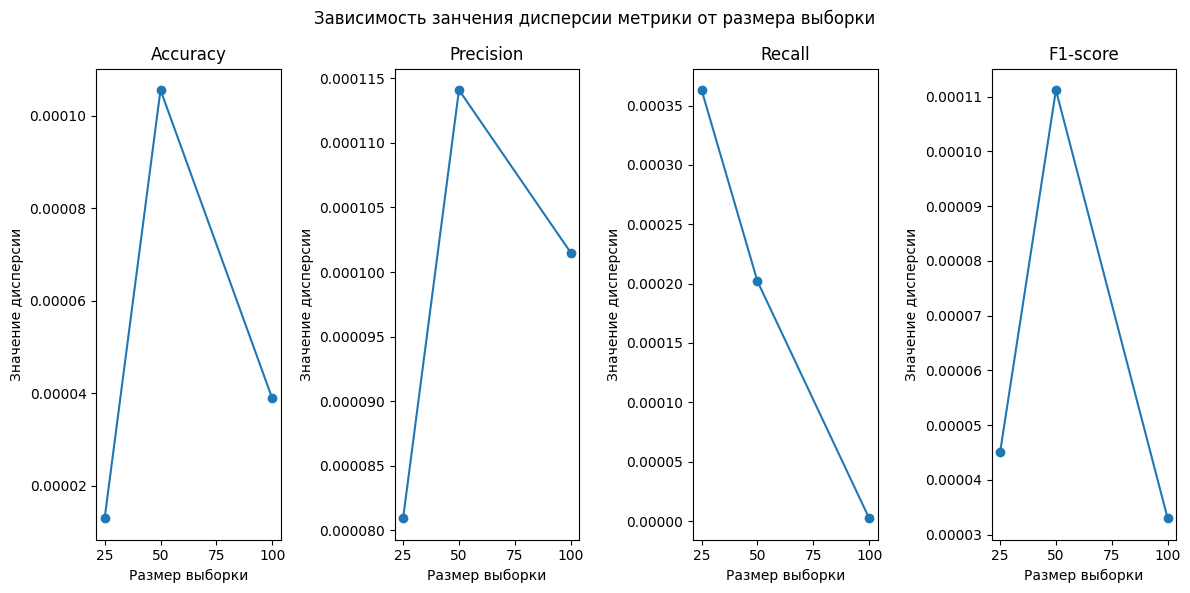

In [ ]:
fig, axes = plt.subplots(ncols=4, figsize = (12, 6))
vars = [acc_vars, prec_vars, rec_vars, f1_vars]
titles = ["Accuracy", "Precision", "Recall", "F1-score"]

for i, var in enumerate(vars):
    axes[i].plot(n, var, marker="o")
    axes[i].set_title(f"{titles[i]}")
    axes[i].set_xlabel("Размер выборки")
    axes[i].set_ylabel("Значение дисперсии")

plt.suptitle("Зависимость значения дисперсии метрики от размера выборки")
plt.tight_layout()

### 2.6 Зависимость важности характеристик от значения $n$.

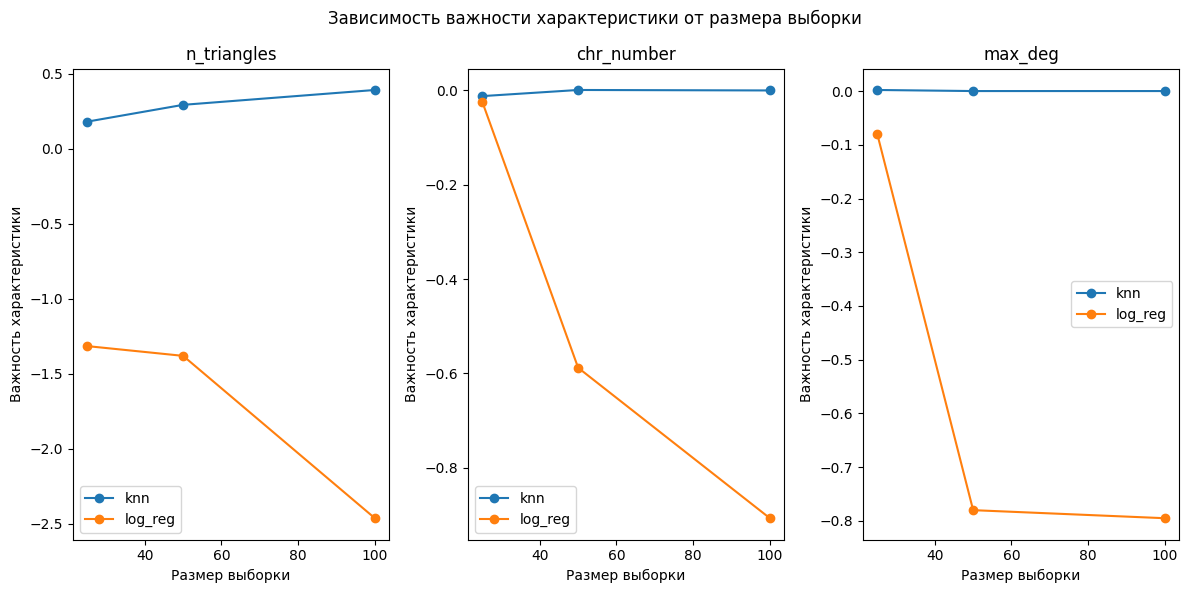

In [210]:
fig, axes = plt.subplots(ncols=3, figsize = (12, 6))
titles = X_test.columns

for i, title in enumerate(titles):
    axes[i].plot(n, knn_imps[i], marker="o", label = "knn")
    axes[i].plot(n, lr_imps[i], marker="o", label = "log_reg")
    # axes[i].plot(n, cbc_imps[i], marker="o", label = "catboost")
    axes[i].legend()
    axes[i].set_title(f"{title}")
    axes[i].set_xlabel("Размер выборки")
    axes[i].set_ylabel("Важность характеристики")

plt.suptitle("Зависимость важности характеристики от размера выборки")
plt.tight_layout()

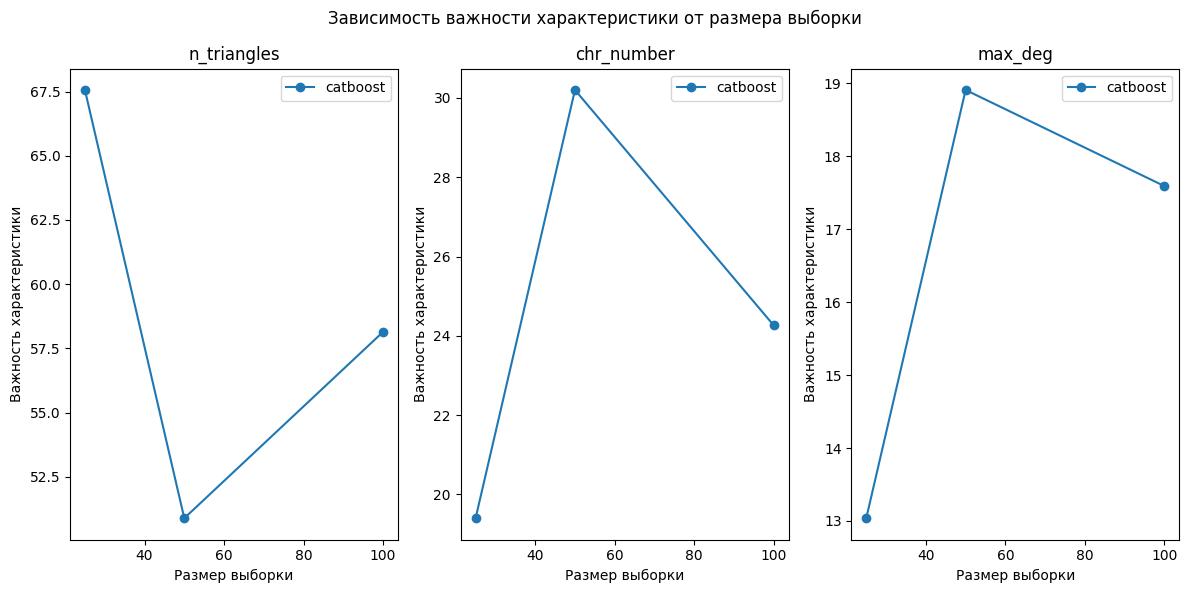

In [211]:
fig, axes = plt.subplots(ncols=3, figsize = (12, 6))
titles = X_test.columns

for i, title in enumerate(titles):
    axes[i].plot(n, cbc_imps[i], marker="o", label = "catboost")
    axes[i].legend()
    axes[i].set_title(f"{title}")
    axes[i].set_xlabel("Размер выборки")
    axes[i].set_ylabel("Важность характеристики")

plt.suptitle("Зависимость важности характеристики от размера выборки")
plt.tight_layout()

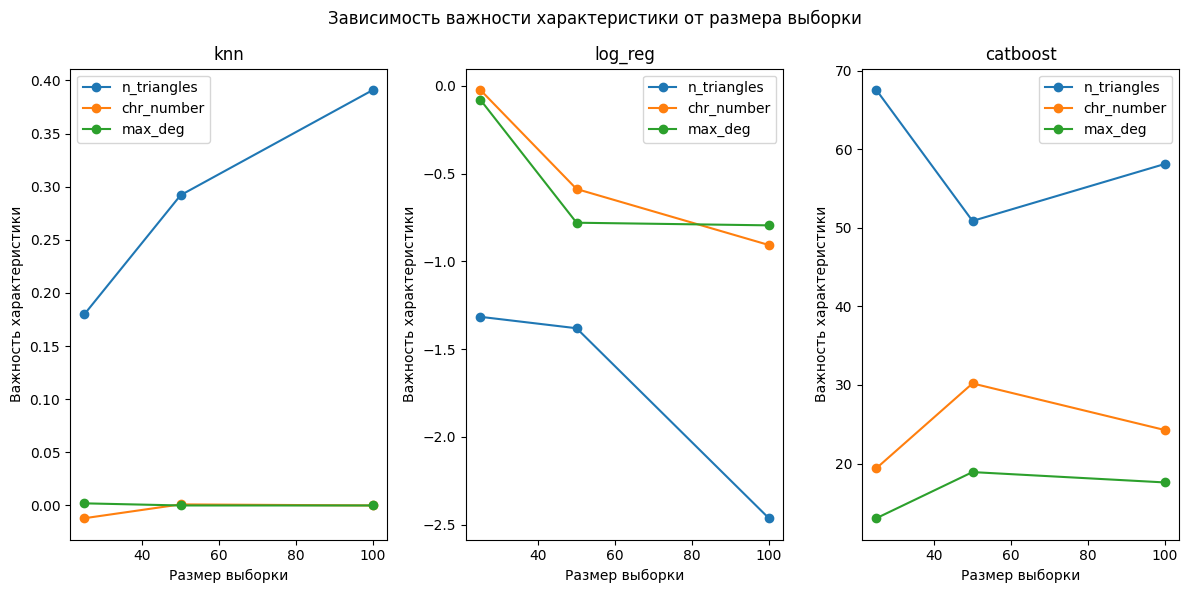

In [212]:
fig, axes = plt.subplots(ncols=3, figsize = (12, 6))
titles = X_test.columns
models = ["knn", "log_reg", "catboost"]
models_imps = [knn_imps, lr_imps, cbc_imps]

for i, model in enumerate(models):
    axes[i].plot(n, models_imps[i][0], marker="o", label = "n_triangles")
    axes[i].plot(n, models_imps[i][1], marker="o", label = "chr_number")
    axes[i].plot(n, models_imps[i][2], marker="o", label = "max_deg")
    axes[i].legend()
    axes[i].set_title(f"{model}")
    axes[i].set_xlabel("Размер выборки")
    axes[i].set_ylabel("Важность характеристики")

plt.suptitle("Зависимость важности характеристики от размера выборки")
plt.tight_layout()

## 3. Подсчет вероятности ошибки первого рода и мощности

In [99]:
best_clf = pipe # Логистическая регрессия, обученная на данных c n = 100

In [100]:
test_samples = build_dataset(skewnormal_distribution, normal_distribution, 1, 1, 1000, 100, "dist", 2)

100%|██████████| 1000/1000 [00:51<00:00, 19.49it/s]


In [101]:
h0_samples = test_samples[test_samples["class"] == 0].drop(columns="class")
h1_samples = test_samples[test_samples["class"] == 1].drop(columns="class")

In [102]:
y_h0_pred = pipe.predict(h0_samples)
y_h1_pred = pipe.predict(h1_samples)

In [103]:
error = sum(y_h0_pred) / len(y_h0_pred)
power = sum(y_h1_pred) / len(y_h1_pred)

In [213]:
print(f"Значение ошибки первого рода: {error}")
print(f"Значение мощности: {power}")

Значение ошибки первого рода: 0.098
Значение мощности: 0.906
